In [ ]:
import pickle as pkl
import numpy as np
import pandas as pd
import json
import sklearn
from sklearn import * 
from pytorch_v2 import TorchGame
from matplotlib import pyplot as plt
from matplotlib import cm
import torch
import numpy as np
import random, math, os

params_test = {
        "Horizon": 3, "Max_actions_chosen": 2, "N_actions_startpoint": 8, "I": .5, "D": 5,
        "Players_action_length": [5, 5], "Max_optim_iter": 75, "Filter_actions": True,
        "Stochastic_state_update": True, "base_params": "custom", "NumRepsBattle": 8,
        "DEVICE": "cpu", "MultiProcess": False
    }

game = TorchGame(**params_test)
pkl_path = "saved_runs/smallRun_smallVarXi/History.pkl"
df = pd.read_pickle(pkl_path)
df = df.loc[:,:]

df.State[0] = game.flatten_var(torch.tensor(game.InitialState.tolist())).numpy()



In [ ]:
techNames = game.TechnologyNames
techNames = ["_".join([x.capitalize() for x in s.split("_")]) for s in techNames]
techNamesFull = ["Sensor technologies", "Collaborative systems", "Technologies enabling mobility", "Control systems & algorithms", "Localisation & mapping", "Sensor fusion",
                 "AI & machine learning", "Edge computing", "Communications & networking", "Energy management", "Simulation & modelling",
                 "Human machine interaction", "Cybersecurity", "Ethics & regulations"]

techNamesFullBroken = ["Sensor technologies", "Collaborative systems", "Technologies \n enabling mobility", "Control systems & \n algorithms", "Localisation & \n mapping", "Sensor fusion",
                 "AI &\n machine learning", "Edge computing", "Communications &\n networking", "Energy management", "Simulation &\n modelling",
                 "Human machine \n interaction", "Cybersecurity", "Ethics &\n regulations"]

paramNames = ["$"+PN.replace(",",", ")+"$" for PN in game.ParamNames]
paramNames[1] = "$\phi, \psi$"
paramNames


In [ ]:
def  plot_or_show(fig,fileName, dir=None):
    if fileName is not None:
        if dir is not None:
            path = os.path.join(os.getcwd(),"figures", dir, fileName)+".pdf"
        else:
            path = os.path.join(os.getcwd(),"figures",  fileName)+".pdf"
        
        print(path)
        # with open(path,"w+") as f:
        plt.savefig(path, format = "pdf")
    else:
        fig.show()
        fig.tight_layout(pad=3)
        
# fig,ax = plt.subplots(1,1)
# ax.scatter(np.random.randn(100),np.random.randn(100))
# plot_or_show(fig, "test")

In [ ]:
techNames

In [ ]:
# child_col = []
# for n in df.Node_id:
#     num_children = len(df[df.Parent_id == n].index)
#     child_col.append(num_children)



# if (df["Reward"]==0).all():
  
#     numReps = 100
#     states = df["State"]
#     states = [game.stack_var(torch.tensor(st, dtype=torch.double)) for st in states.values.tolist()]
#     thetas = [game.techToParams(st) for st in states]
#     scores = [np.mean([game.SalvoBattleSequential(th).numpy() for _ in range(numReps)]) for th in thetas]
#     scores = scores
#     print(scores)
#     df["Reward"] = scores
#     df.to_pickle(pkl_path)
# else:
#     print("df aldready contained scores")
# # df["Reward"] = game.SalvoBattleSequential(game.techToParams()

In [ ]:
df.Reward

In [ ]:
print(df.Action[1].shape,
    df.State[0].shape)

In [ ]:
# print(df.State[0])
# tmp = np.concatenate((df.State[0][:,0],df.State[0][:,1]),0)
# print(tmp)
# print(df.State[13])

# df.State[1] = tmp

In [ ]:
plt.style.use('bmh')
# plt.rcParams["figure.facecolor"] = "D1E2FF"
# plt.rcParams["axes.facecolor"] = "F2F8FF"
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times new roman"]
# display(plt.rcParams.keys())

In [11]:
nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
print(nParams, nTech)

In [ ]:
state_grid = np.linspace(-1,12,1000)
trl_base = game.TechnologyReadiness(torch.tensor(state_grid)).numpy()

plt.plot(state_grid, trl_base)
plt.ylabel("TRL")
plt.xlabel("Cummulative research-progress")
plt.title("TRL curve")
plt.savefig("figures/TRL/generic_trl.pdf",format="pdf")

In [ ]:
def plot_trl(old_state, new_state, title, fileName = None):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    print(nParams, nTech)
    

    old_state_A = old_state[:nTech]
    new_state_A = new_state[:nTech]
    
    old_trl_A = game.TechnologyReadiness(old_state_A).numpy()
    new_trl_A = game.TechnologyReadiness(new_state).numpy()

    
    old_state_B = old_state[nTech:]
    new_state_B = new_state[nTech:]
    
    old_trl_B = game.TechnologyReadiness(old_state_B).numpy()
    new_trl_B = game.TechnologyReadiness(new_state_B).numpy()
        
    state_grid = np.linspace(-1,12,1000)
    trl_base = game.TechnologyReadiness(torch.tensor(state_grid)).numpy()
    
    
    # fig.suptitle(title,  fontsize="xx-large")
    for i in range(nTech):
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(7,4)
        k = i
        # print(i,j,"-",k)
        # print(r,c)
        ax.plot(state_grid, trl_base)
        #otes
        ax.scatter(old_state_A[k].numpy(), old_trl_A[k], color="blue", alpha = .5, label ="Player A previous value")
        ax.scatter(old_state_B[k].numpy(), old_trl_B[k], color="red", alpha = .5, label ="Player B previous value")
        #nes
        ax.scatter(new_state_A[k].numpy(), new_trl_A[k], color="blue", alpha = 1, label ="Player A new value")
        ax.scatter(new_state_B[k].numpy(), new_trl_B[k], color="red", alpha = 1, label ="Player B new value")
        ax.set_title(techNamesFull[k])
        ax.legend()
        ax.set_xlabel('Cumulative research-progress')
        ax.set_ylabel('TRL')
            
            
            
        print(techNamesFull[k])
        plot_or_show(fig, fileName+"_"+str(i), "TRL")
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(pad=3)
    
def plot_act_theta(state, action, state_id, fileName = None):
    nParams, nTech = game.PARAMCONVERSIONMATRIX.size()
    
    action = game.stack_var(action)
    theta = game.techToParams(game.stack_var(state))
    
    theta_A = theta[:,0].numpy()
    action_A = action[:,0].numpy()
   
    theta_B = theta[:,1].numpy()
    action_B = action[:,1].numpy()
    
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(14,4)
    # fig.suptitle(title)
    
    width = .5
    r = np.arange(nTech)
    axs[0].set_title(f"Actions of each player in sampled state")
    axs[0].bar(r, action_A, color="blue", width= width, label="Player A")
    axs[0].bar(r+width, action_B, color="red", width= width, label="Player B")
    # axs[1].xticks(r + width/2 , labels = game.ParamNames)
    axs[0].set_xticks(r + width/2)
    axs[0].set_xticklabels(labels = techNames)
    axs[0].legend()
    
    
    
    # width = .5
    r = np.arange(nParams)
    axs[1].set_title(f"Battle Parameters of each player in sampled state")
    axs[1].bar(r, theta_A, color="blue", width= width, label="Player A")
    axs[1].bar(r+width, theta_B, color="red", width= width, label="Player B")
    # axs[1].xticks(r + width/2 , labels = game.ParamNames)
    axs[1].set_xticks(r + width/2)
    axs[1].set_xticklabels(labels = paramNames)
    axs[1].legend()



    fig.autofmt_xdate()

    
    plot_or_show(fig, fileName, None)
    
#     if fileName is not None:
        
#         fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
#     else:
#         fig.show()
#         # fig.tight_layout(pad=3)

#     # fig.show()
    
    
# # df.Action[9]

In [ ]:
# df[df.Node_id == 0].State.values

In [ ]:

print(df.columns)
numPoints = len(df.index)
old_state_i = df.Parent_id
states =df.State
actions = df.Action

plot_ind = 5

p_id = df.loc[plot_ind,:].Parent_id
print(p_id)
old_state =  torch.tensor(df[df.Node_id == p_id].State.values.tolist()).squeeze()

new_state =  torch.tensor(states[plot_ind]).squeeze()

act = torch.tensor(actions[plot_ind]).squeeze()
plot_act_theta(new_state, act, plot_ind, "actionTheta")
plot_trl(old_state,new_state, "Technology research progress in one timestep", "TRL_onestep")



In [ ]:
leaf_nodes = df[df.Time == df.Time.max()].Node_id.values

In [ ]:

print(df.columns)
numPoints = len(df.index)
old_state_i = df.Parent_id
states =df.State
actions = df.Action

print(leaf_nodes)
plot_ind = df.Node_id.max()

p_id = np.random.choice(leaf_nodes)
p_id = 29
print(p_id) #29, 44
old_state =  torch.tensor(df[df.Node_id == 0].State.values.tolist()).squeeze()

new_state =  torch.tensor(df[df.Node_id == p_id].State.values.tolist()).squeeze()

act = torch.tensor(actions[plot_ind]).squeeze()
# plot_act_theta(new_state, act, plot_ind)
plot_trl(old_state,new_state, "Technology research progress throughout full simulation", "TRL_fullGame")

# print(old_state)
# print(new_state)
# print(act)

In [38]:
old_state_A = old_state[:14].numpy()
old_state_B = old_state[14:28].numpy()
new_state_A = new_state[:14].numpy()
new_state_B = new_state[14:28].numpy()

deltaTRL_A = (new_state_A - old_state_A) / old_state_A
deltaTRL_B = (new_state_B - old_state_B) / old_state_B

actions = torch.tensor(df.Action[1:].values.tolist())
actionsA = actions[:,:nTech]
actionsB = actions[:,nTech:]

meansA = actionsA.mean(dim=0).numpy()
meansB = actionsB.mean(dim=0).numpy()

fullNames = ["AI & Machine Learning", "Collaborative systems", "Communications & Networking", "Control systems & Algorithms", "Cybersecurity", "Edge Computing", "Energy Management", "Ethics & Regulations", "Human Machine Interaction", "Localization & Mapping", "Sensor Fusion", "Sensor Technologies", "Simulation & Modeling", "Technologies enabling mobility"]
columnNames = ["Technology",	"X_0",	"X_T A",	"X_T B",	"delta TRL A (%)",	"delta TRL B (%)",	"Average investment of total budget (%), A",	"Average investment of total budget (%), B"]

res_table = pd.DataFrame([techNames, old_state_A, new_state_A, new_state_B, deltaTRL_A, deltaTRL_B, meansA, meansB]).T
res_table.columns = columnNames
res_table = res_table.sort_values('Technology')

res_table.to_excel("res_table.xlsx")


In [18]:
# (.values.astype(np.float32))

acts = torch.tensor(df.Action.dropna().values.tolist())
# Vals.shape
# Vals[:,game.N_Technologies:]
def update_projection(ax, axi, projection='3d', fig=None):
    if fig is None:
        fig = plt.gcf()
    rows, cols, start, stop = axi.get_subplotspec().get_geometry()
    ax.flat[start].remove()
    ax.flat[start] = fig.add_subplot(rows, cols, start+1, projection=projection)

/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesidede_PCA_all_action.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesided_PCA_last_action.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesided_PCA_all_state.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesided_PCA_last_state.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesided_PCA_all_theta.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/onesided_PCA_all_theta.pdf


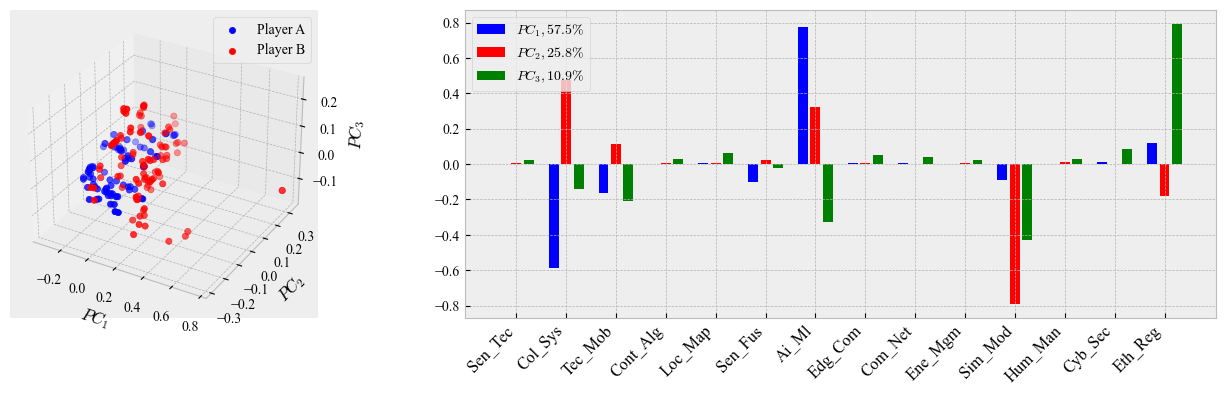

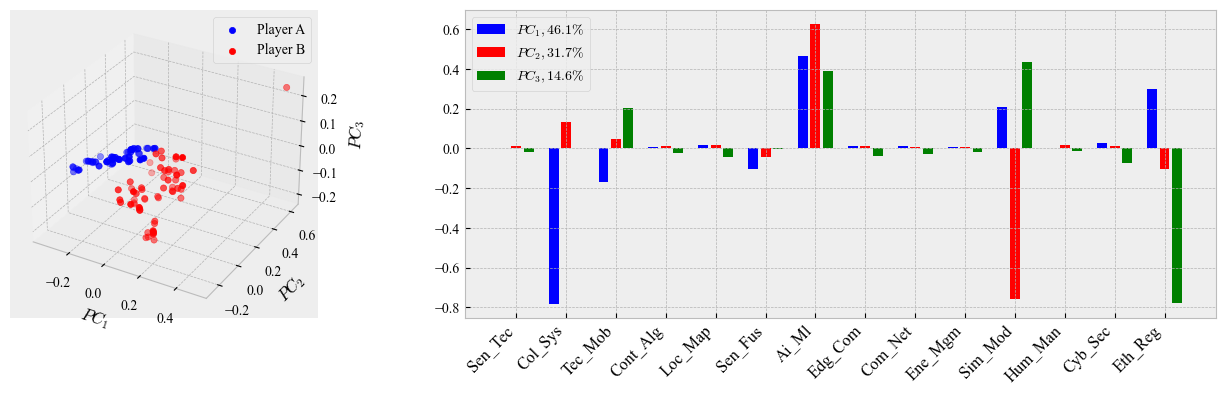

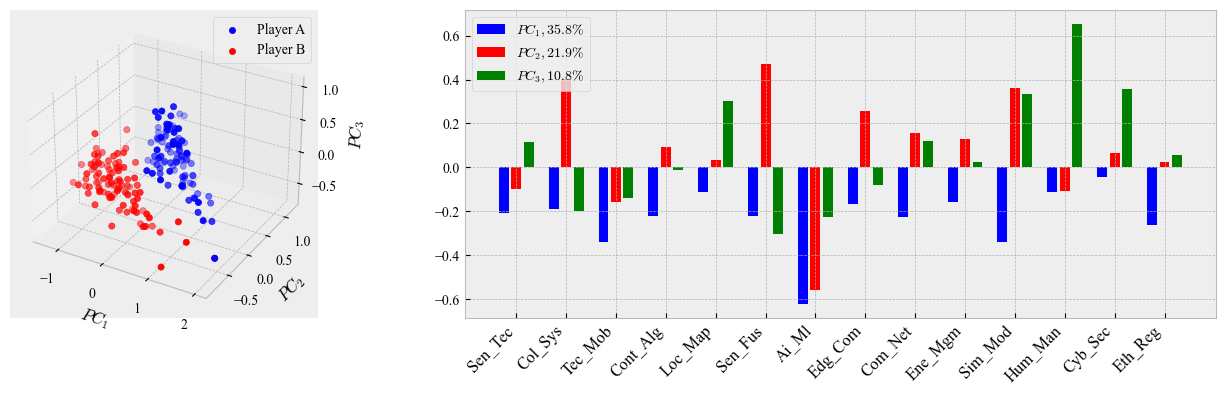

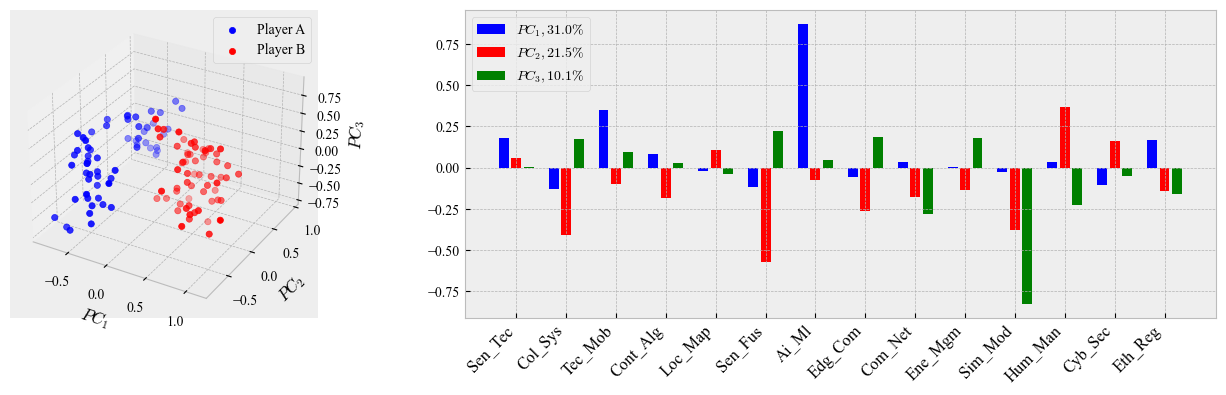

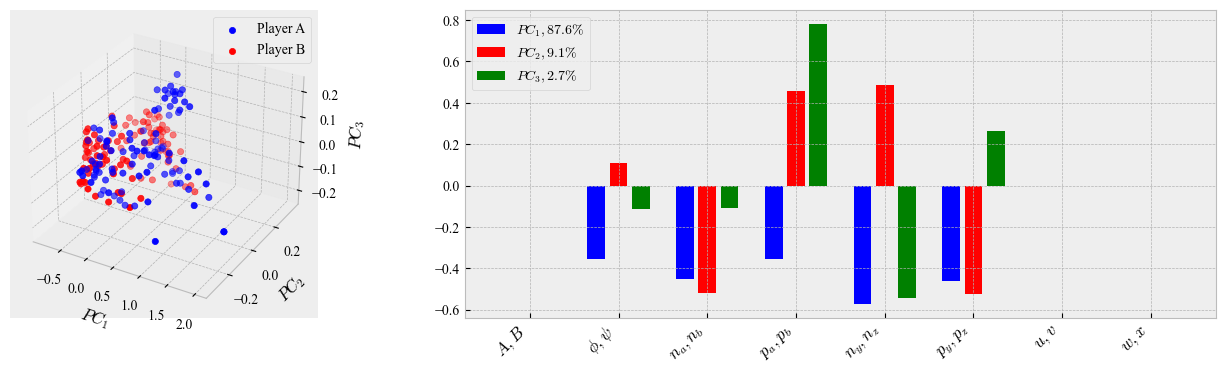

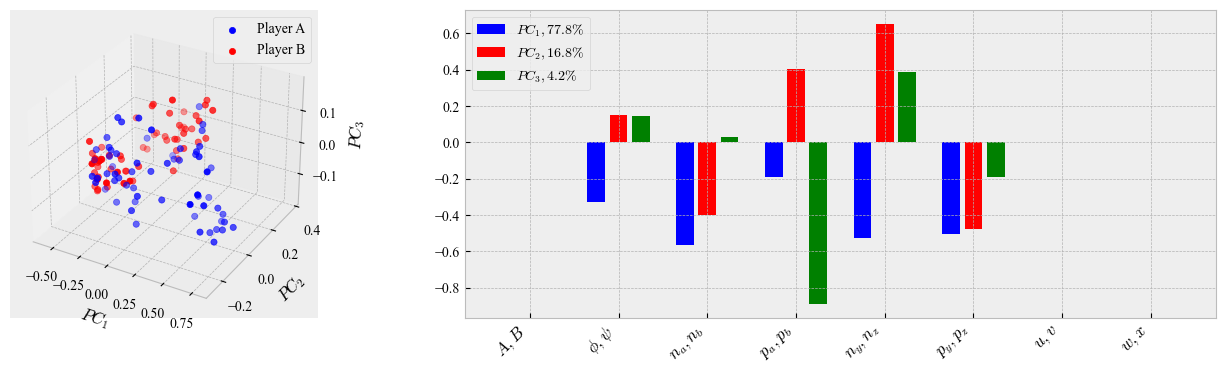

In [19]:
# num
def one_sided_pca_plot(df, key, t_max, fileName = None):
    
    if t_max:
        df = df[df.Time == df.Time.max()]
    if key == "Theta":
        key = "State"
        theta = True
    else: 
        theta = False
    
    
    
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    numVals = vals.shape[0]
    if theta:
        thetas = []
        for i in range(numVals):
            # print(vals.shape)
            nTech = int(vals.shape[1] / 2)
            
            # a = vals[i,:nTech].T
            # b = vals[i,nTech:].T
            # print(a,b)
            state = game.stack_var(vals[i,:])
            # print(state)
            th = game.techToParams(state).numpy()
            thetas.append(th[:,0])            
            thetas.append(th[:,1])
            allVals = thetas
    else:
       
        valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()
        allVals = np.concatenate((valsA,valsB),0)
        
    
    pca = sklearn.decomposition.PCA(3)
    pca_fit_AB = pca.fit_transform(allVals)
    
    pca_fit_A = pca_fit_AB[:numVals,:]
    pca_fit_B = pca_fit_AB[numVals:,:]

    fig, ax = plt.subplots(1,2,figsize=(16,4), width_ratios=(1,2))
    
    update_projection(ax,ax.flat[0],"3d")
    ax1, ax2 = ax
    # fix , axs = plt.subplots(1,2,width_ratios=(1,3))
    # ax = axs[0]
    # if t_max:
    #     fig.suptitle(f"{numVals} {key}s in last time-step")
    # else:
    #     fig.suptitle(f"{numVals} {key}s")
        
    # ax = fig.add_subplot(1,2, 1 ,projection='3d')

    ax1.scatter(pca_fit_A[:,0], pca_fit_A[:,1], pca_fit_A[:,2], color="blue", label="Player A")
    ax1.scatter(pca_fit_B[:,0], pca_fit_B[:,1], pca_fit_B[:,2], color="red", label="Player B")

    ax1.set_xlabel('$PC_1$')
    ax1.set_ylabel('$PC_2$')
    ax1.set_zlabel('$PC_3$')
    
    # ax1.set_title(f"{key if  not theta else 'Battle parameter'}s projected onto PC1, PC2, PC3")
    
    ax1.legend()
    
    
    components = pca.components_
    var = pca.explained_variance_ratio_
    
    nTech = np.shape(components[0])[0]
    nComps = len(components)
   
    # ax2 = fig.add_subplot(1,2,2 )
    # ax2.set_title(f"{key if  not theta else 'BattleParam'}s, first {nComps} Principal components. \n explained variance:{np.round(var,2)}")
    
   
    width = .5
    r = np.arange(nTech)
    
    ax2.bar(r, components[0], color="blue", width=1/5,          label=f"$PC_1, {round(100 * var[0],1)} \%$")
    ax2.bar(r + width/2, components[1], color="red", width=1/5, label=f"$PC_2, {round(100 * var[1],1)} \%$")
    ax2.bar(r + width, components[2], color="green", width=1/5, label=f"$PC_3, {round(100 *var[2],1)} \%$")
    if  theta:
        ax2.set_xticks(r + width/2, paramNames, rotation = 45, ha="right", fontsize=12)
    else:
        ax2.set_xticks(r + width/2, techNames, rotation = 45, ha="right", fontsize=12)
    # ax2.set_xticklabels(labels = game.TechnologyNames)
    # ax2.set_x
    ax2.legend(loc = "upper left")
    
    
    fig.tight_layout()
    
    plot_or_show(fig,fileName, None)
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(h_pad = 0, pad=0)

    

one_sided_pca_plot(df, "Action",False,"onesidede_PCA_all_action")
one_sided_pca_plot(df, "Action", True, "onesided_PCA_last_action")
one_sided_pca_plot(df, "State", False, "onesided_PCA_all_state"  )
one_sided_pca_plot(df, "State",  True,  "onesided_PCA_last_state" )
one_sided_pca_plot(df, "Theta", False,"onesided_PCA_all_theta"  )
one_sided_pca_plot(df, "Theta",  True, "onesided_PCA_all_theta"  )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_all_action.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_last_action.pdf


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_all_state.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_last_state.pdf


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_all_theta.pdf
/Users/lukaspeterson/Desktop/LiU/Exjobb/Progg/exjobb/figures/twosided_PCA_all_theta.pdf


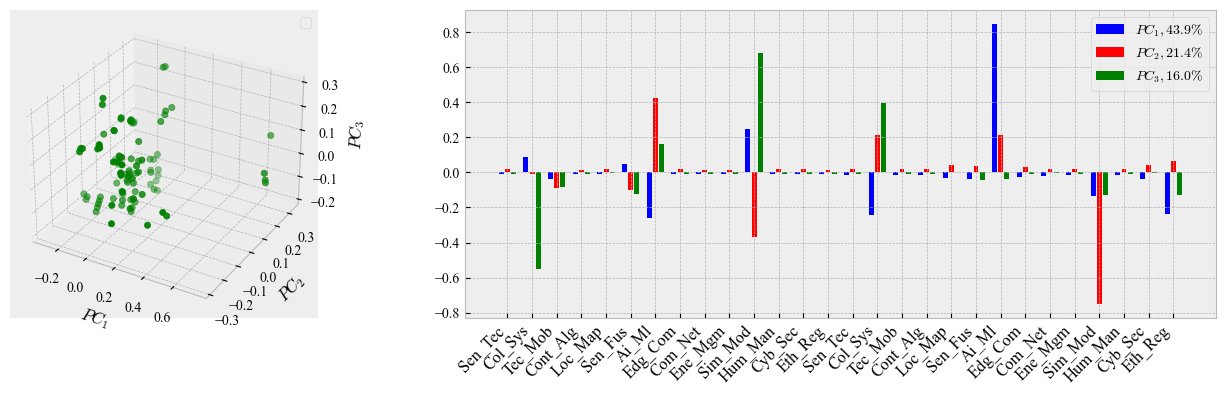

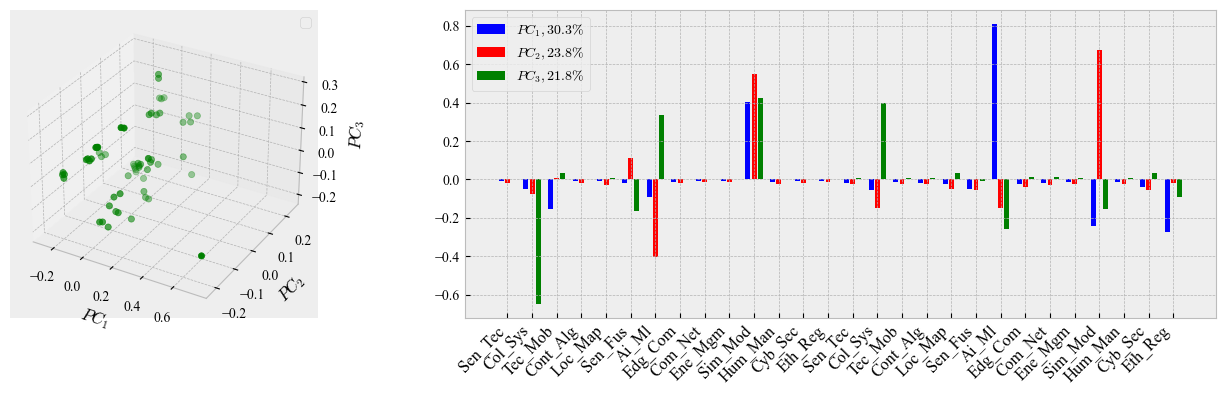

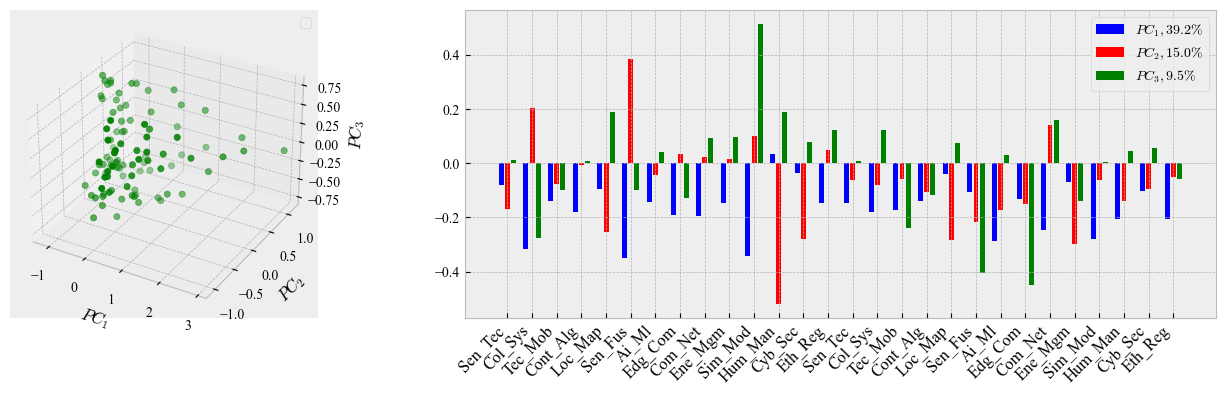

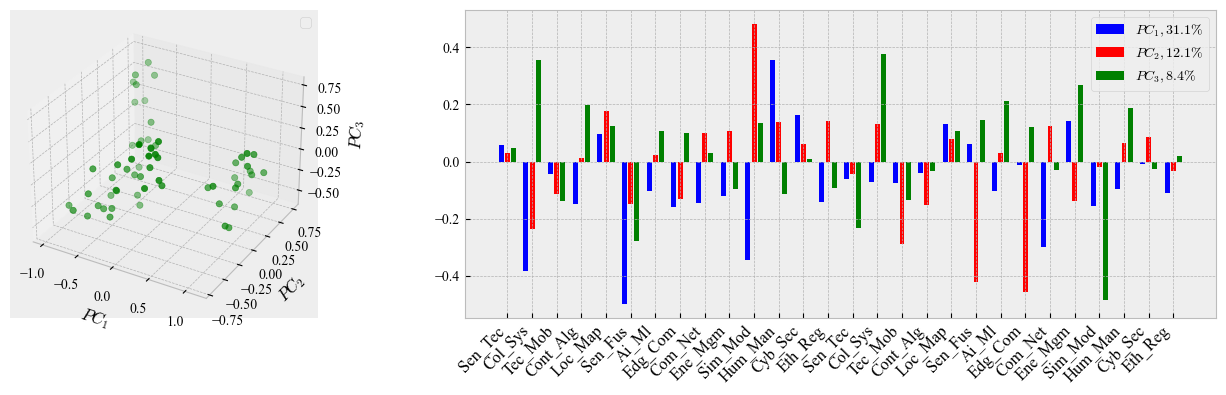

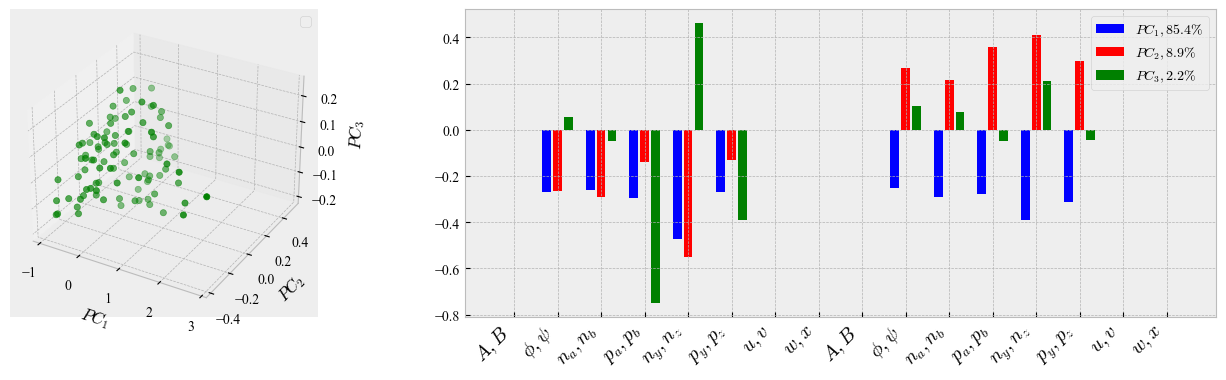

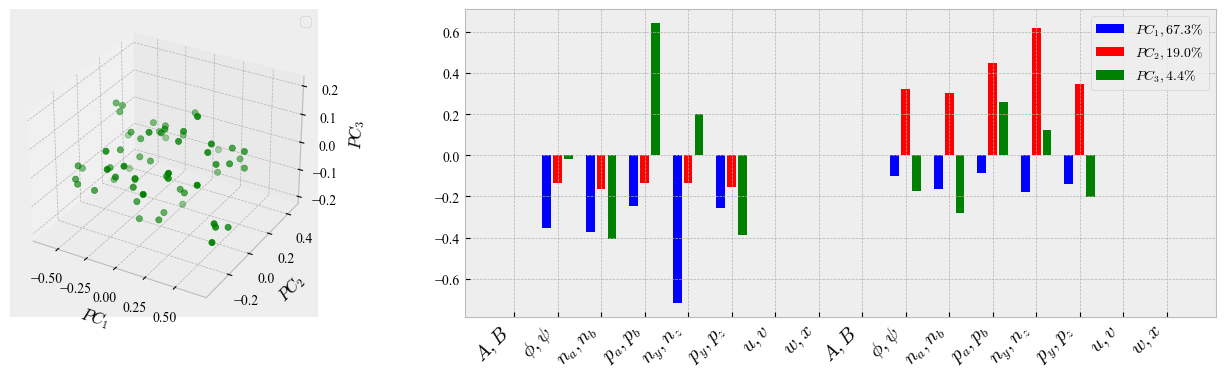

In [20]:

    
def two_sided_pca_plot(df, key, t_max, fileName = None):
    if t_max:
        df = df[df.Time == df.Time.max()]
    if key == "Theta":
        key = "State"
        theta = True
    else: 
        theta = False
        
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    numVals = vals.shape[0]
    if theta:
        thetas = []
        for i in range(numVals):
            # print(vals.shape)
            nTech = int(vals.shape[1] / 2)
            
            # a = vals[i,:nTech].T
            # b = vals[i,nTech:].T
            # print(a,b)
            state = game.stack_var(vals[i,:])
            # print(state)
            th = game.flatten_var(game.techToParams(state)).numpy()
            thetas.append(th)            
            # thetas.append(th)
            allVals = thetas
    else:

        valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()
        allVals = np.concatenate((valsA,valsB),1)
        
    
    pca = sklearn.decomposition.PCA(3)
    pca_fit = pca.fit_transform(allVals)
    
    # pca_fit_A = pca_fit_AB[:numVals,:]


    fig, ax = plt.subplots(1,2,figsize=(16,4), width_ratios=(1,2))
    
    update_projection(ax,ax.flat[0],"3d")
    ax1, ax2 = ax
    # fix , axs = plt.subplots(1,2,width_ratios=(1,3))
    # ax = axs[0]
    # if t_max:
    #     fig.suptitle(f"{numVals} {key}s in last time-step")
    # else:
    #     fig.suptitle(f"{numVals} {key}s")
        
    # ax = fig.add_subplot(2,2,1  ,projection='3d')

    ax1.scatter(pca_fit[:,0], pca_fit[:,1], pca_fit[:,2], color="green")

    ax1.set_xlabel('$PC_1$')
    ax1.set_ylabel('$PC_2$')
    ax1.set_zlabel('$PC_3$')
    
    # ax1.set_title(f"{key if  not theta else 'BattleParams'}s projected onto PC1, PC1, PC3")
    
    ax1.legend()
    
    
    components = pca.components_
    var = pca.explained_variance_ratio_
    
    nTech = np.shape(components[0])[0]
    nComps = len(components)
   
    # ax2 = fig.add_subplot(2,4,3 )
    # ax2.set_title(f"{key if  not theta else 'Battle Parameter' }s, first {nComps} Principal components. \n explained variance:{np.round(var,2)}")
    
   
    width = .5
    r = np.arange(nTech)
    
    ax2.bar(r, components[0], color="blue", width=1/5,          label=f"$PC_1, {round(100 * var[0],1)} \%$")
    ax2.bar(r + width/2, components[1], color="red", width=1/5, label=f"$PC_2, {round(100 * var[1],1)} \%$")
    ax2.bar(r + width, components[2], color="green", width=1/5, label=f"$PC_3, {round(100 *var[2],1)} \%$")

    if  theta:
        ax2.set_xticks(r + width/2, paramNames * 2, rotation = 45, ha="right", fontsize=14)
    else:
        ax2.set_xticks(r + width/2, techNames * 2, rotation = 45, ha="right", fontsize=12)
    # ax2.set_xticklabels(labels = game.TechnologyNames)
    # ax2.set_x
    ax2.legend()
    
    
    
    plot_or_show(fig,fileName, None)
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(h_pad = 0, pad=0)

    
    

two_sided_pca_plot(df,"Action", False, "twosided_PCA_all_action")
two_sided_pca_plot(df,"Action", True ,"twosided_PCA_last_action")
two_sided_pca_plot(df,"State", False, "twosided_PCA_all_state")  
two_sided_pca_plot(df,"State", True,  "twosided_PCA_last_state")
two_sided_pca_plot(df, "Theta", False,"twosided_PCA_all_theta"  )
two_sided_pca_plot(df, "Theta", True, "twosided_PCA_all_theta" )

In [21]:
lower = 0 
upper = 12
numPoints = 20
ranges = [np.linspace(lower,upper,numPoints) for _ in range(2*nTech)]
# [_ for _ in ranges[0]]
# grids = np.mgrid(ranges)

# for points in zip(grids):
#     print(points)

In [22]:
import itertools
lower = 1 
upper = 12

numPoints = 100
nParams = 10
numReps = 1
for vals in itertools.combinations_with_replacement(range(lower,upper,numPoints),10):
    print(vals)
    # thetaA = [6] + list(vals[:5]) + [1/3, 1]
    # thetaB = [6] + list(vals[5:]) + [1/3, 1]
    # theta_list = torch.tensor(thetaA + thetaB)
    # print(theta_list)

    # theta = torch.stack((theta_list[:8], theta_list[8:]), dim=1).squeeze()
    # try:
    #     score = np.mean([game.SalvoBattleSequential(theta).numpy() for _ in range(numReps)])
    # except AssertionError:
    #     score = None
    # print(score)
    

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


In [23]:

for vals in itertools.combinations_with_replacement(range(lower,25,numPoints),10):
    print(vals)

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)


In [24]:
def theta_pca_score(df, fileName = None):
    key = "Theta"
    if key == "Theta":
        key = "State"
        theta = True
    else: 
        theta = False
        
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    numVals = vals.shape[0]
    if theta:
        thetas = []
        for i in range(numVals):
            
            
            state = game.stack_var(vals[i,:])
            # print(state)
            th = game.flatten_var(game.techToParams(state)).numpy()
            thetas.append(th)            
            # thetas.append(th)
            allVals = thetas
    else:

        valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()
        allVals = np.concatenate((valsA,valsB),1)
        
    
    pca = sklearn.decomposition.PCA(3)
    pca_fit = pca.fit_transform(allVals)
    print(len(allVals))
    
    
    scores = df["Reward"].tolist()
    hi = max(scores)
    lo = min(scores)
    # print(hi, lo)
    green = np.array([0, 255, 0, 0.75*255])/255
    red =  np.array([255, 0, 0, 0.75*255])/255
    standardizedScores = [(s-lo)/(hi-lo) for s in scores]
    # print(standardizedScores)
    colors = [green * ss + red * ( 1 - ss) for ss in standardizedScores ]
    # print(colors)
    
    
    
    fig, axs = plt.subplots(1,1,subplot_kw={"projection": "3d"}, figsize=(6,6))
    # fig.set
    # update_projection(axs,axs.flat[0])
    # fig.suptitle(f"low:{round(lo,3)}, high:{round(hi,3)}")
    
    # ax = axs[0]
    ax = axs
    ax.scatter(pca_fit[:,0], pca_fit[:,1], pca_fit[:,2], color = colors)

    ax.set_xlabel('$PC_1$')
    ax.set_ylabel('$PC_2$')
    ax.set_zlabel('$PC_3$')

    # fig.colorbar(scores,ax=ax)


    plot_or_show(fig,fileName)
    
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(h_pad = 0, pad=0)
    
    
theta_pca_score(df.loc[1:,:], "PCA_theta_score")

100


ZeroDivisionError: division by zero

In [ ]:
df.shape

(101, 6)

0.94264036
c:\Users\IsakG\projects\exjobb\figures\explained_variance_all_action.pdf
0.9231742
c:\Users\IsakG\projects\exjobb\figures\explained_variance_last_action.pdf
0.6850621520008797
c:\Users\IsakG\projects\exjobb\figures\explained_variance_all_state.pdf
0.6260566069083369
c:\Users\IsakG\projects\exjobb\figures\explained_variance_last_state.pdf


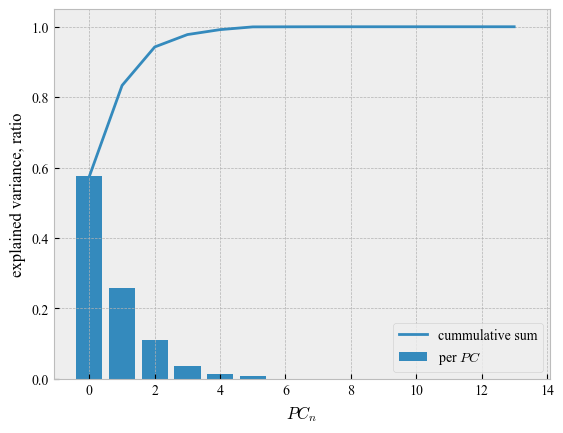

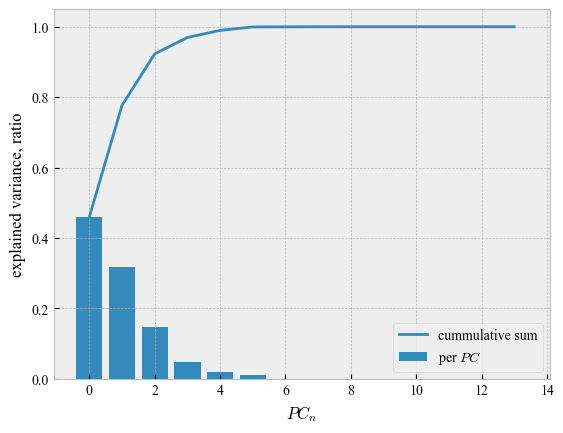

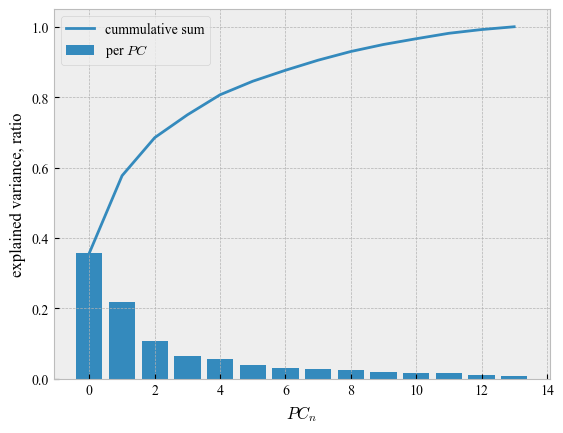

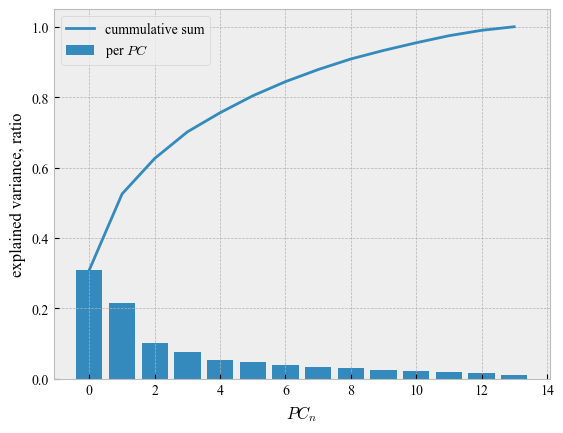

In [ ]:
def all_pca_plot(df, key, t_max=False, fileName = None):
    if t_max:
        df = df[df.Time == df.Time.max()]
    if key == "theta":
        vals = torch.tensor(getattr(df, "State").dropna().values.tolist())
        thetas = []
        for i in range(max(vals.size)):
            
            
            state = game.stack_var(vals[i,:])
            # print(state)
            th = game.flatten_var(game.techToParams(state)).numpy()
            thetas.append(th)            
            thetas.append(th)
        vals = thetas
        vals
    else:
        
        vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    
        # print(vals)
        numVals = vals.shape[0]
        valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()

    # print(valsA, valsB)
    pca = sklearn.decomposition.PCA()
    pca_fit_AB = pca.fit_transform(np.concatenate((valsA,valsB),0))
    
    evr = pca.explained_variance_ratio_
    
    fig, ax = plt.subplots(1,1)
    # ax.set_title(f"explained variance of PC, {key}")
    ax.bar(range(pca.n_components_),evr, label="per $PC$")
    ax.plot(range(pca.n_components_),np.cumsum(evr), label ="cummulative sum")
    
    ax.set_xlabel("$PC_n$")
    ax.set_ylabel("explained variance, ratio")
    ax.legend(loc="best")    
    print(np.cumsum(evr)[2])
    plot_or_show(fig,fileName)
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(h_pad = 0, pad=0)

all_pca_plot(df, "Action", False, "explained_variance_all_action")
all_pca_plot(df, "Action", True, "explained_variance_last_action")
all_pca_plot(df, "State", False, "explained_variance_all_state")
all_pca_plot(df, "State", True, "explained_variance_last_state")
# all_pca_plot(df, "Theta", False)
# all_pca_plot(df, "Theta", True)

0.6850621520008797
c:\Users\IsakG\projects\exjobb\figures\explained_variance_all_state.pdf
c:\Users\IsakG\projects\exjobb\figures\EXPLAINED_VARIANCE\explained_variance_last_state.pdf
c:\Users\IsakG\projects\exjobb\figures\EXPLAINED_VARIANCE\explained_variance_last_state.pdf


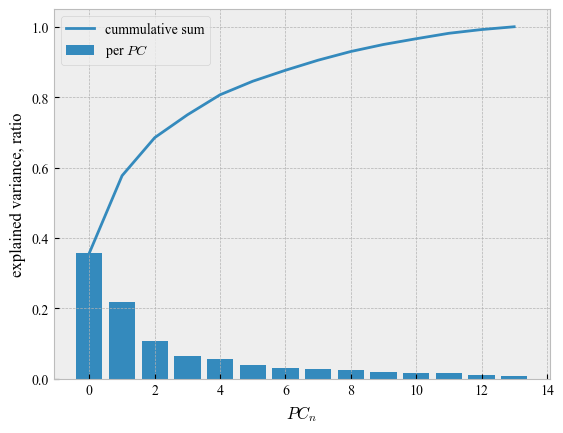

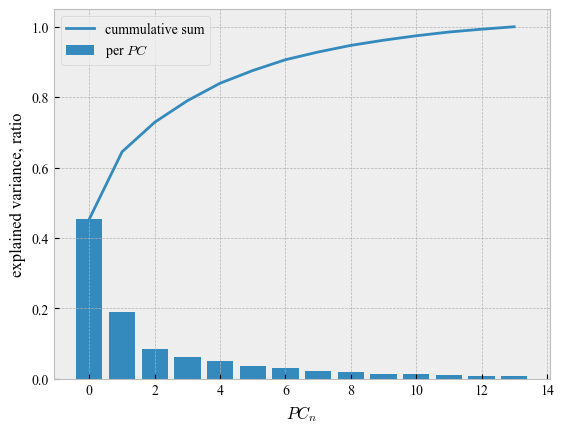

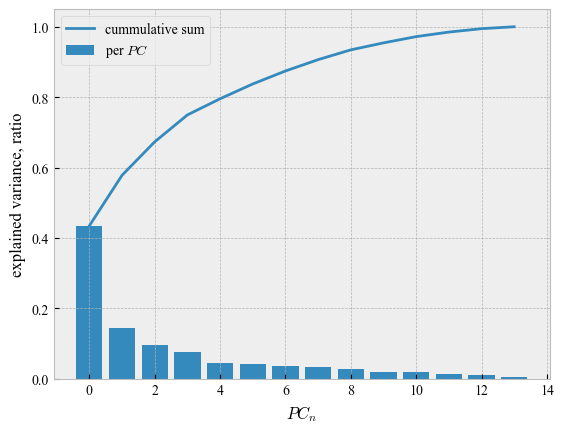

In [ ]:
def onePlayer_pca_plot(df, key, t_max=False, player = 0, fileName = None):
    if t_max:
        df = df[df.Time == df.Time.max()]
    vals = torch.tensor(getattr(df, key).dropna().values.tolist())
    
    # print(vals)
    numVals = vals.shape[0]
    valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()

    # print(valsA, valsB)
    pca = sklearn.decomposition.PCA()
    # pca_fit_AB = pca.fit_transform(np.concatenate((valsA,valsB),0))
    if player == 0:    
        pca_fit = pca.fit_transform(valsA,0)
    elif player == 1:
        pca_fit = pca.fit_transform(valsB,0)
    
    # pca_fit.explain_variance_raito_
    evr = pca.explained_variance_ratio_
    
    fig, ax = plt.subplots(1,1)
    # ax.set_title(f"explained variance of PC, {key}")
    ax.bar(range(pca.n_components_),evr, label="per $PC$")
    ax.plot(range(pca.n_components_),np.cumsum(evr), label ="cummulative sum")
    
    ax.set_xlabel("$PC_n$")
    ax.set_ylabel("explained variance, ratio")
    ax.legend(loc="best")    
    # ax.axvline(2)
    plot_or_show(fig,fileName, "EXPLAINED_VARIANCE")
    # if fileName is not None:
    #     fig.savefig(os.path.join("figures", fileName, ".pdf"), format = "pdf")
    # else:
    #     fig.show()
    #     fig.tight_layout(h_pad = 0, pad=0)

# all_pca_plot(df, "Action", False,0, "explained_variance_all_action")
# all_pca_plot(df, "Action", True,0 "explained_variance_last_action")
all_pca_plot(df, "State", False, "explained_variance_all_state")
onePlayer_pca_plot(df, "State", False, 0,"explained_variance_last_state")
onePlayer_pca_plot(df, "State", False, 1,"explained_variance_last_state")

# all_pca_plot(df, "Theta", False)
# all_pca_plot(df, "Theta", True)

c:\Users\IsakG\projects\exjobb\figures\average_investment_technologies.pdf


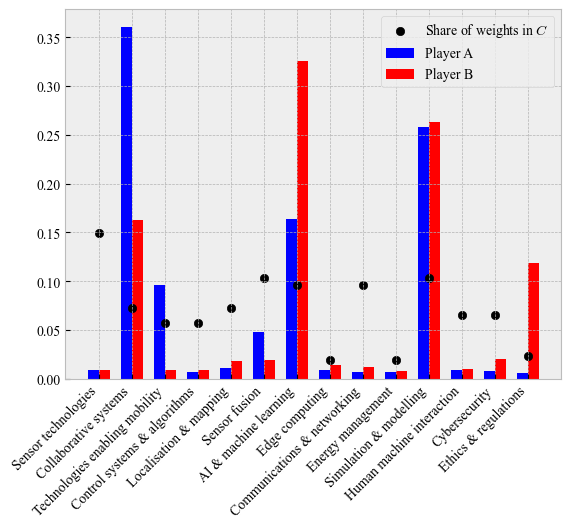

In [ ]:
## Total capital invested normalised
Budget = [1,1]
nTech
actions = torch.tensor(df.Action[1:].values.tolist())
actionsA = actions[:,:nTech]
actionsB = actions[:,nTech:]

meansA = actionsA.mean(dim=0)
meansB = actionsB.mean(dim=0)

fig, ax = plt.subplots(1,1)
# ax2 = fig.add_subplot(1,2,2 )
# ax.set_title(f"Average investment per technology per player")


width = .5
r = np.arange(nTech)

ax.bar(r - width/3, meansA, color="blue", width=1/3, label="Player A")
ax.bar(r + width/3, meansB, color="red", width=1/3, label="Player B")
ax.set_xticks(r, techNamesFull, rotation = 45, ha="right")
ax.scatter(r,game.PARAMCONVERSIONMATRIX.sum(axis=0)/game.PARAMCONVERSIONMATRIX.sum(axis=0).sum(), color="black", label="Share of weights in $C$")
ax.legend()
# ax.bar(r + width, components[2], color="green", width=1/5, label="PC3")
# if  theta:
#     ax2.set_xticks(r + width/2, game.ParamNames * 2, rotation = 45, ha="right")
# else:
#     ax2.set_xticks(r + width/2, game.TechnologyNames * 2, rotation = 45, ha="right")
# ax2.set_xticklabels(labels = game.TechnologyNames)
# ax2.set_x
# ax2.legend()


plot_or_show(fig,"average_investment_technologies")
# fig.tight_layout(h_pad = 0, pad=0)
# fig.show()
# fig.savefig(os.path.join("figures", "average_investment_technologies", ".pdf"), format = "pdf")

c:\Users\IsakG\projects\exjobb\figures\average_investment_params.pdf


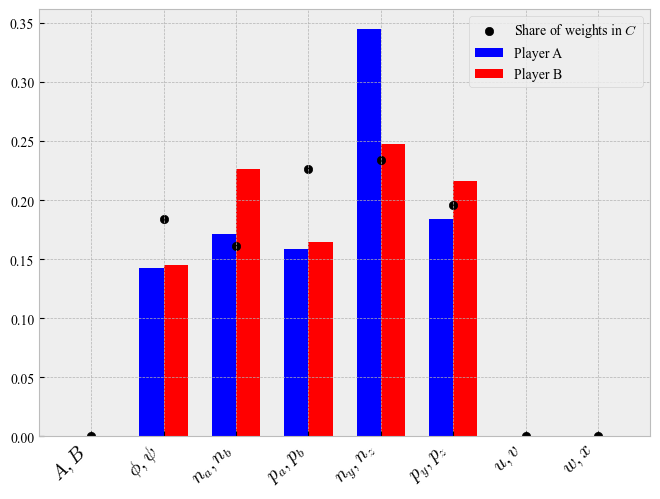

In [ ]:
## Total capital invested normalised
Budget = [1,1]
C = game.PARAMCONVERSIONMATRIX
C_comp = game.PARAMCONVERSIONMATRIX.sum(axis=1)/game.PARAMCONVERSIONMATRIX.sum()

actions = torch.tensor(df.Action[1:].values.tolist(),dtype=torch.double)

actionsA = actions[:,:nTech]
actionsB = actions[:,nTech:]

deltaThetaA = C @ actionsA.T
deltaThetaB = C @ actionsB.T
# print(deltaThetaA.size())

deltaThetaA_means = deltaThetaA.mean(dim=1)
deltaThetaA_means = deltaThetaA_means / deltaThetaA_means.sum()
deltaThetaB_means = deltaThetaB.mean(dim=1)
deltaThetaB_means = deltaThetaB_means / deltaThetaB_means.sum()

# meansA = actionsA.mean(dim=0)
# meansB = actionsB.mean(dim=0)

fig, ax = plt.subplots(1,1)
# ax2 = fig.add_subplot(1,2,2 )
# ax.set_title(f"Average parameter impact of investments  per player")


width = .5
r = np.arange(len(paramNames))

ax.bar(r - width/3, deltaThetaA_means, color="blue", width=1/3, label="Player A")
ax.bar(r + width/3, deltaThetaB_means, color="red", width=1/3, label="Player B")
ax.set_xticks(r, paramNames, rotation = 45, ha="right", fontsize=14)
ax.scatter(r,C_comp, color="black", label="Share of weights in $C$")
ax.legend()
# ax.bar(r + width, components[2], color="green", width=1/5, label="PC3")
# if  theta:
#     ax2.set_xticks(r + width/2, game.ParamNames * 2, rotation = 45, ha="right")
# else:
#     ax2.set_xticks(r + width/2, game.TechnologyNames * 2, rotation = 45, ha="right")
# ax2.set_xticklabels(labels = game.TechnologyNames)
# ax2.set_x
# ax2.legend()


fig.tight_layout(h_pad = 0, pad=0)
# fig.show()
plot_or_show(fig,"average_investment_params")
# fig.savefig(os.path.join("figures", "average_investment_params", ".pdf"), format = "pdf")

In [ ]:
print(deltaThetaB_means, "\n",
    paramNames)
print(nParams)

tensor([0.0000, 0.1447, 0.2265, 0.1648, 0.2476, 0.2163, 0.0000, 0.0000],
       dtype=torch.float64) 
 ['$A, B$', '$\\phi, \\psi$', '$n_a, n_b$', '$p_a, p_b$', '$n_y, n_z$', '$p_y, p_z$', '$u, v$', '$w, x$']
10


In [ ]:
C.size()

torch.Size([8, 14])

[26, 29, 60, 33, 16, 7, 15, 31, 46, 44, 28, 11, 30, 12, 37]
26
[47, 41, 32, 3, 2, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_0.pdf
29
[57, 56, 54, 51, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_1.pdf
60
[99, 92, 81, 50, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_2.pdf
33
[63, 62, 53, 51, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_3.pdf
16
[30, 13, 5, 4, 2, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_4.pdf
7
[21, 16, 5, 4, 2, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_5.pdf
15
[29, 13, 5, 4, 2, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_6.pdf
31
[59, 55, 54, 51, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_7.pdf
46
[79, 70, 52, 51, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORIES\trajectories_8.pdf
44
[77, 71, 52, 51, 1, 0]
c:\Users\IsakG\projects\exjobb\figures\TRAJECTORI

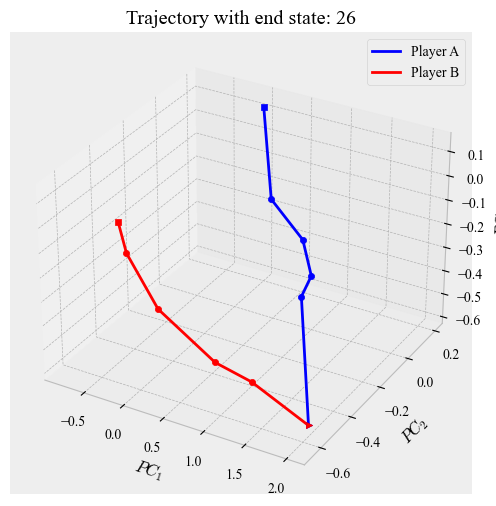

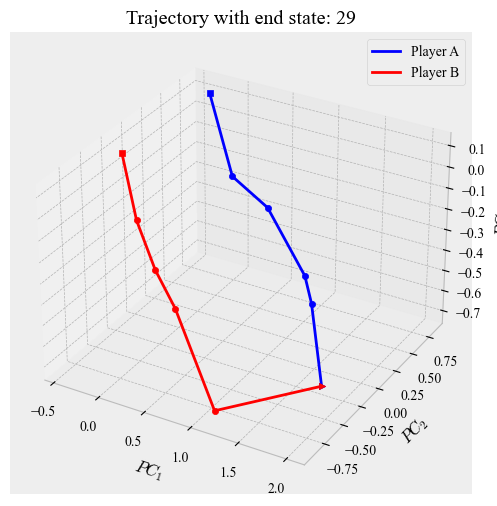

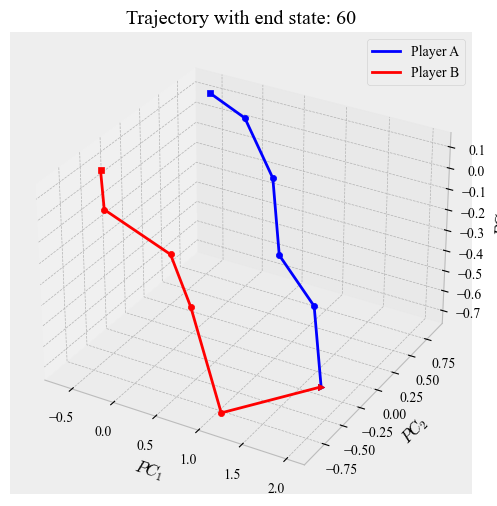

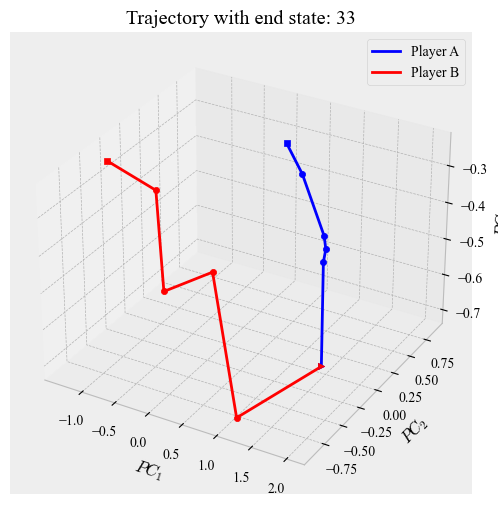

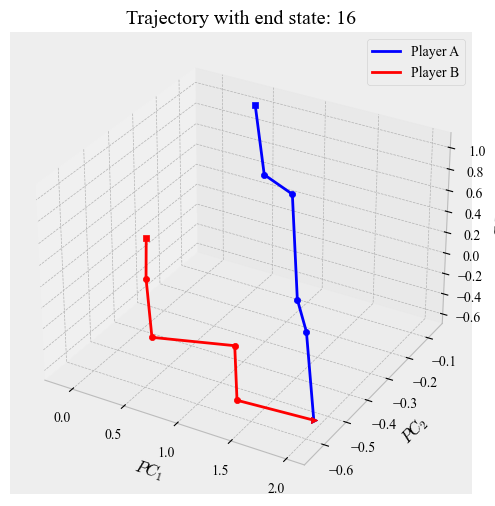

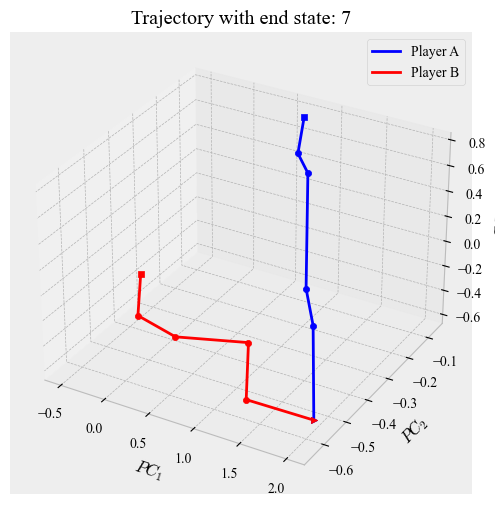

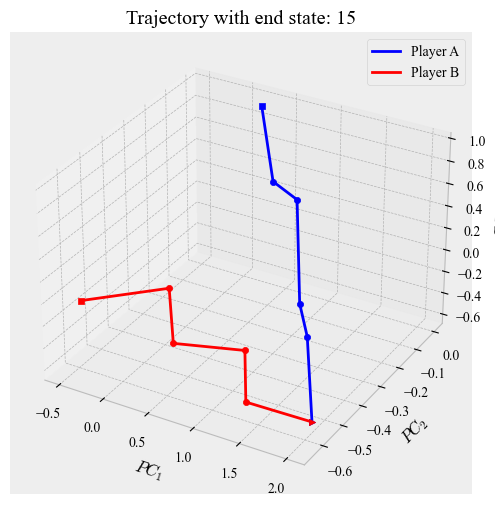

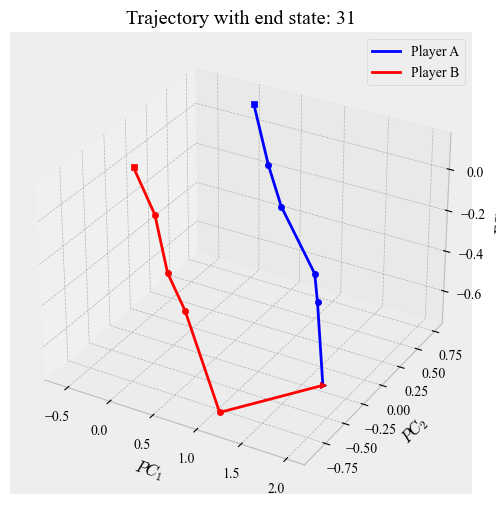

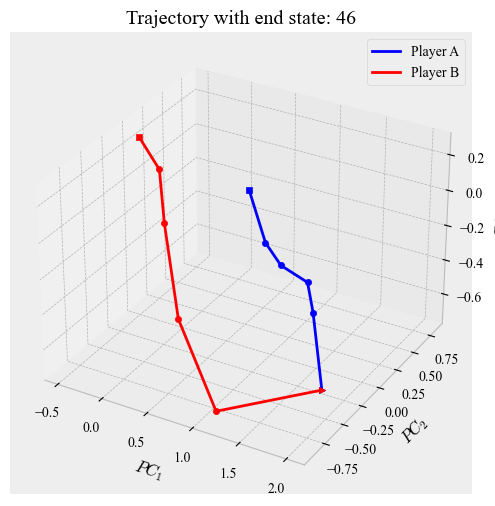

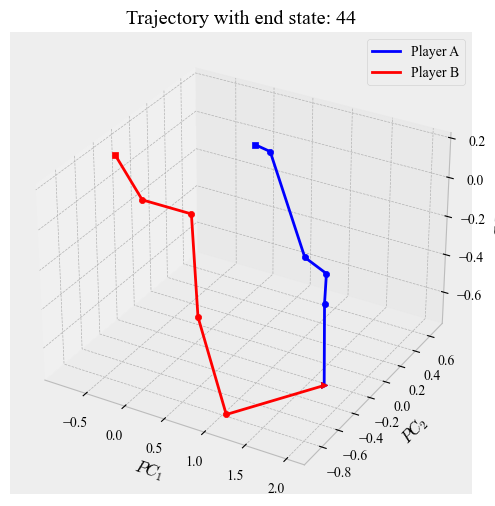

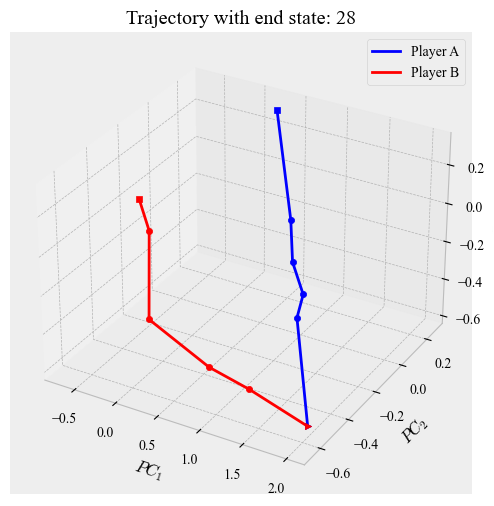

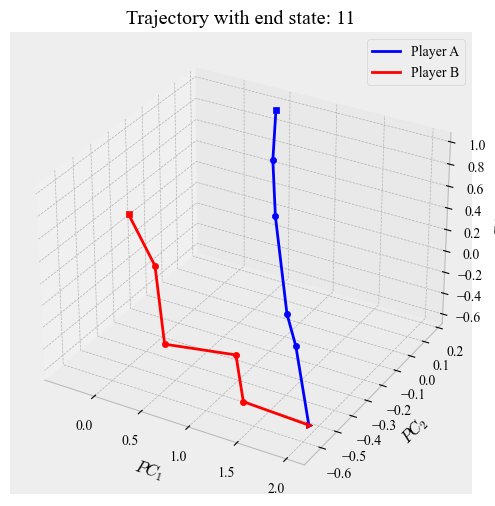

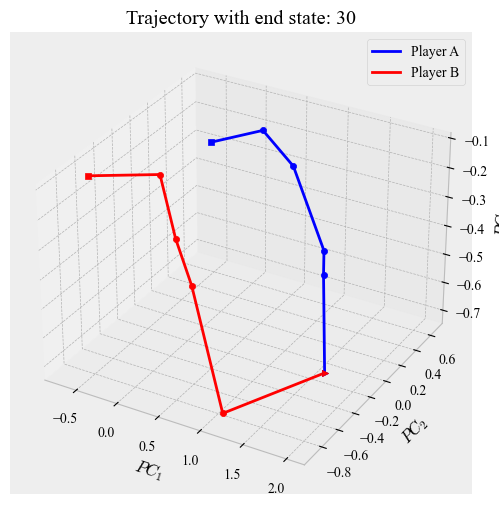

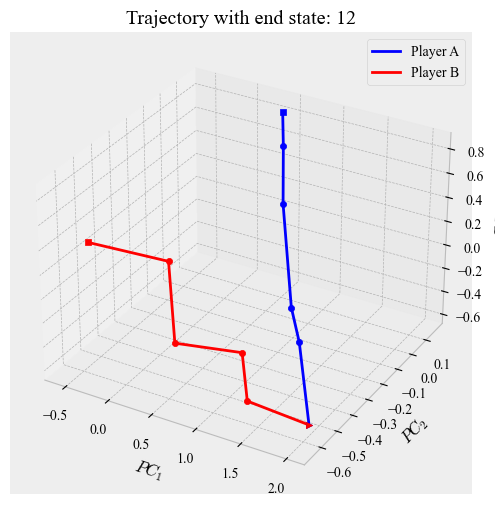

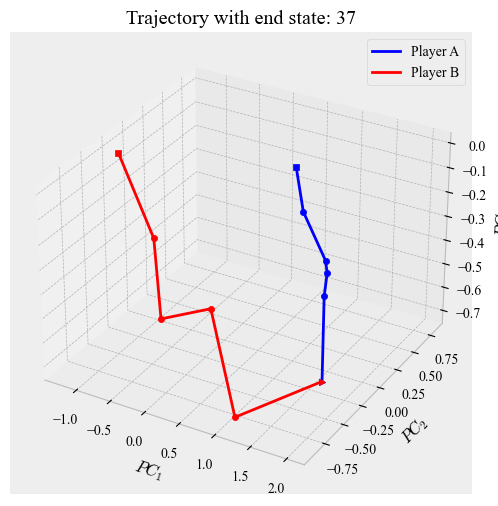

In [ ]:
trajectories = []
pca = sklearn.decomposition.PCA(3)
vals = torch.tensor(getattr(df, "State").dropna().values.tolist())
valsA, valsB = (vals[:,:game.N_Technologies]).numpy(), (vals[:,game.N_Technologies:]).numpy()
allVals = np.concatenate((valsA,valsB),0)
# print(allVals.shape)
pca.fit(allVals)
states_A_pca = pca.transform(valsA)
states_B_pca = pca.transform(valsB)

# pca_fit = pca.fit_transform(allVals)

def get_trajectory(df, node_id):
    node_ids = [node_id]

    while node_id  != 0:
        node_id = int(df[df.Node_id == node_id].Parent_id.values[0])
        node_ids.append(node_id)
    # node_ids.append(0)
    return node_ids

leaf_nodes = df[df.Time == df.Time.max()].Node_id.values.tolist()
leaf_nodes
trajectories = []
for l_id in leaf_nodes:
    traj =  get_trajectory(df, node_id=l_id)
    # print(traj)
    trajectories.append(traj)
    
states = torch.Tensor(df[df.Node_id.isin(traj)].State.values.tolist())
# print(states.shape)
# statesA = states[:,:nTech].numpy()
# statesB = states[:,nTech:].numpy()
# statesA = pca.transform(statesA).tolist()
# statesB = pca.transform(statesB).tolist()

numPlots = min(len(trajectories),15)


sample_idx = random.sample(range(len(trajectories)),numPlots)
print(sample_idx)
for i in range(numPlots):
    fig, ax = plt.subplots(1,1,figsize=(6,6), subplot_kw= {"projection" : "3d"})
    idx = sample_idx[i]
    print(idx)
    traj = trajectories[idx]

    # iterating over grid

    ax.set_xlabel('$PC_1$')
    ax.set_ylabel('$PC_2$')
    ax.set_zlabel('$PC_3$')

    # ax.set_xlim3d((-25,25))
    # ax.set_ylim3d((-100,100))
    # ax.set_zlim3d((-50,50))    

    print(traj)
    states_A_pca_traj = states_A_pca[traj]
    states_B_pca_traj = states_B_pca[traj]
    # print(states_B_pca_traj)
    # print(states_A_pca_traj)
    # print(states_A_pca_traj[:,0])
    l = len(states_A_pca_traj)
    # print(l)
    markers = tuple(['s'] + ['o']*(l-2) + ['>'])
    ax.set_title(f"Trajectory with end state: {idx}")
    ax.plot(states_A_pca_traj[:,0], states_A_pca_traj[:,1], states_A_pca_traj[:,2], color="blue", label="Player A")#, marker=markers)
    ax.plot(states_B_pca_traj[:,0], states_B_pca_traj[:,1], states_B_pca_traj[:,2], color="red", label ="Player B")#, marker=markers)

    for j in range(len(traj)):
        if j == 0:
            label = "stop"
        elif j == (len(traj) - 1):
            label ="start"
        else:
            label = None
            
        ax.scatter(states_A_pca_traj[j,0], states_A_pca_traj[j,1], states_A_pca_traj[j,2], color="blue", marker=markers[j])#, label=label)
        ax.scatter(states_B_pca_traj[j,0], states_B_pca_traj[j,1], states_B_pca_traj[j,2], color="red", marker=markers[j])#, label=label)
        ax.legend()
    # ax.show()
    plot_or_show(fig,"trajectories"+"_"+str(i), "TRAJECTORIES")
    # fig.savefig(os.path.join("figures", "trajectories", ".pdf"), format = "pdf")

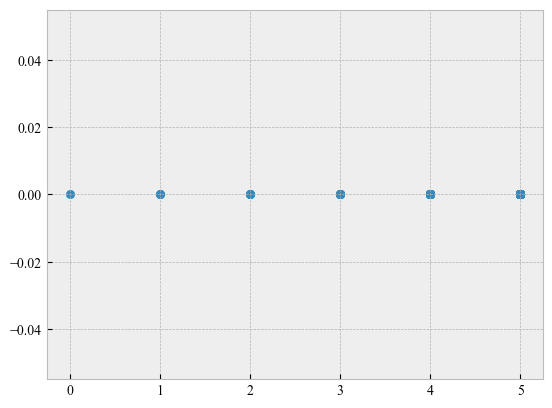

In [ ]:
Tmax = df.Time.max()
H1 = plt.scatter(df.Time, df.Reward,color=(0,0,1,.7), label="States reached")
score_means = df.groupby("Time").mean().Reward
# print(score_means)
plt.ylabel("$S(\\theta)$")
plt.xlabel("$t$")

H3 = plt.plot(range(Tmax+1),score_means, color=(1,0,1,1), ls="-",lw=1, label="Average value in timestep")
flag = True
for traj in trajectories:
    traj_scores = df[df.Node_id.isin(traj)].Reward
    # print(traj)
    # print(traj_scores)
    if flag:
        H2 = plt.plot(range(Tmax+1), traj_scores, color=(0,0,1,.5), ls="--", lw=.5, label="parent-child connection")
    else:
        H2 = plt.plot(range(Tmax+1), traj_scores, color=(0,0,1,.5), ls="--", lw=.5)
    flag = False
plt.legend()
# plt.legend([H1,H2,H3])
plt.savefig("figures/winprob_t.pdf",format="pdf")

In [ ]:
child_col = []
for n in df.Node_id:
    num_children = len(df[df.Parent_id == n].index)
    child_col.append(num_children)
